 # ANALYSIS OF A FLIGHT DATASET

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing both tables (x_test and y_test)

In [218]:
X_test = pd.read_csv('C:/Users/GLORIA UDOH/X_test.csv')

In [219]:
X_test.head(10)

,flight_id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left
0,278519,Air_India,AI-559,Hyderabad,Early_Morning,one,Night,Mumbai,14.75,22
1,264230,Vistara,UK-720,Kolkata,Early_Morning,one,Evening,Mumbai,9.33,6
2,260097,Vistara,UK-852,Bangalore,Morning,one,Evening,Chennai,10.42,27
3,218935,Vistara,UK-747,Delhi,Early_Morning,zero,Morning,Kolkata,2.08,47
4,211085,Air_India,AI-762,Delhi,Night,one,Night,Mumbai,23.83,41
5,251748,Air_India,AI-505,Bangalore,Morning,one,Night,Mumbai,11.17,37
6,292760,Air_India,AI-430,Chennai,Morning,one,Night,Mumbai,11.33,39
7,292966,Air_India,AI-440,Chennai,Early_Morning,one,Night,Mumbai,15.08,42
8,245610,Air_India,AI-565,Bangalore,Afternoon,one,Morning,Delhi,18.75,12
9,261821,Air_India,AI-773,Kolkata,Evening,one,Afternoon,Delhi,19.00,11


In [220]:

Y_test = pd.read_csv('C:/Users/GLORIA UDOH/y_test.csv')

In [221]:
Y_test.head(10)

,flight_id,price
0,278519,45883
1,264230,58223
2,260097,49992
3,218935,45896
4,211085,59033
5,251748,54684
6,292760,49553
7,292966,49553
8,245610,37658
9,261821,53743


In [222]:
Y_test.rename(columns={' price ': 'flight_fee'}, inplace=True)

## Joining both tables (x_test and y_test) to give a more complete dataset (x_flight)

In [223]:
x_flight = pd.merge(left = X_test, right = Y_test, on = "flight_id", how = "inner")
x_flight.head()

,flight_id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,flight_fee
0,278519,Air_India,AI-559,Hyderabad,Early_Morning,one,Night,Mumbai,14.75,22,45883
1,264230,Vistara,UK-720,Kolkata,Early_Morning,one,Evening,Mumbai,9.33,6,58223
2,260097,Vistara,UK-852,Bangalore,Morning,one,Evening,Chennai,10.42,27,49992
3,218935,Vistara,UK-747,Delhi,Early_Morning,zero,Morning,Kolkata,2.08,47,45896
4,211085,Air_India,AI-762,Delhi,Night,one,Night,Mumbai,23.83,41,59033


## This shows information about the data, checking for null values and also describing the data numerically

In [224]:
x_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3347 entries, 0 to 3346
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flight_id         3347 non-null   int64  
 1   airline           3347 non-null   object 
 2   flight            3347 non-null   object 
 3   source_city       3347 non-null   object 
 4   departure_time    3347 non-null   object 
 5   stops             3347 non-null   object 
 6   arrival_time      3347 non-null   object 
 7   destination_city  3347 non-null   object 
 8   duration          3347 non-null   float64
 9   days_left         3347 non-null   int64  
 10  flight_fee        3347 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 313.8+ KB


In [225]:
x_flight.isna().sum()

flight_id           0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
duration            0
days_left           0
flight_fee          0
dtype: int64

In [226]:
x_flight.describe()

,flight_id,duration,days_left,flight_fee
count,3347.000000,3347.000000,3347.000000,3347.000000
mean,252666.002689,13.725139,25.924709,52473.302659
std,28968.354955,6.856276,13.506734,13309.492361
min,7837.000000,1.250000,1.000000,2339.000000
25%,229026.500000,8.830000,14.000000,45054.500000
50%,252599.000000,13.080000,26.000000,53164.000000
75%,277146.500000,17.920000,38.000000,60396.000000
max,300141.000000,36.170000,49.000000,103819.000000


## This shows the number of rows & columns and also the data types of each column

In [227]:
x_flight.shape

(3347, 11)

In [228]:
x_flight.dtypes

flight_id             int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
duration            float64
days_left             int64
flight_fee            int64
dtype: object

## This shows the Distinct Values From each column

In [229]:
x_flight.airline.unique()

array(['Air_India', 'Vistara', 'Indigo', 'GO_FIRST', 'SpiceJet',
       'AirAsia'], dtype=object)

In [230]:
x_flight.source_city.unique()

array(['Hyderabad', 'Kolkata', 'Bangalore', 'Delhi', 'Chennai', 'Mumbai'],
      dtype=object)

In [231]:
x_flight.destination_city.unique()

array(['Mumbai', 'Chennai', 'Kolkata', 'Delhi', 'Bangalore', 'Hyderabad'],
      dtype=object)

In [232]:
x_flight.departure_time.unique()

array(['Early_Morning', 'Morning', 'Night', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [233]:
x_flight.arrival_time.unique()

array(['Night', 'Evening', 'Morning', 'Afternoon', 'Early_Morning',
       'Late_Night'], dtype=object)

## The data and graph below shows the number of flights from each city (souce_city & destination_city) 

In [234]:
Top_cities_flights = x_flight.groupby("source_city")["flight"].count().reset_index().sort_values("flight", ascending=False)
Top_cities_flights

,source_city,flight
5,Mumbai,689
2,Delhi,682
0,Bangalore,614
1,Chennai,456
4,Kolkata,455
3,Hyderabad,451


In [235]:
Top_cities_flights = x_flight.groupby("destination_city")["flight"].count().reset_index().sort_values("flight", ascending=False)
Top_cities_flights

,destination_city,flight
5,Mumbai,710
2,Delhi,585
3,Hyderabad,530
0,Bangalore,524
4,Kolkata,512
1,Chennai,486


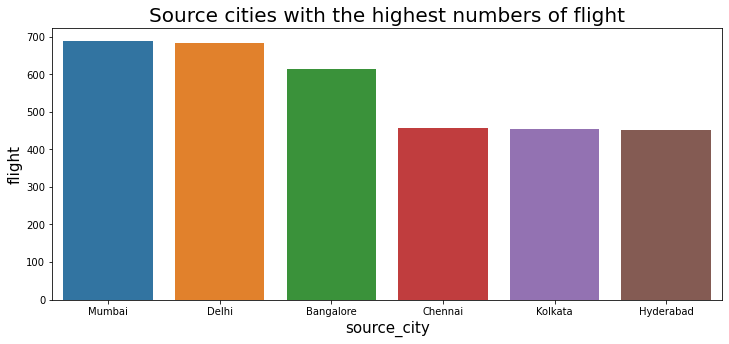

In [236]:
Top_cities_flights = x_flight.groupby("source_city")["flight"].count().reset_index().sort_values("flight", ascending=False)
fig = plt.figure(figsize=(12,5))
plt.title('Source cities with the highest numbers of flight',size = 20)
flight = sns.barplot(data = Top_cities_flights, x = 'source_city', y = 'flight', edgecolor = 'none')
plt.xlabel('source_city', size=15)
plt.ylabel('flight', size=15)
plt.show()

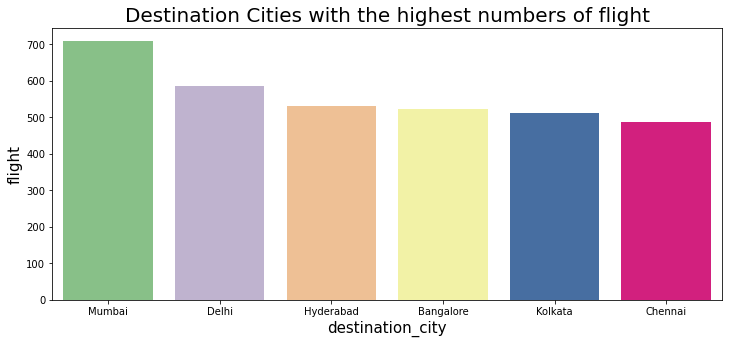

In [237]:
Top_cities_flights = x_flight.groupby("destination_city")["flight"].count().reset_index().sort_values("flight", ascending=False)
fig = plt.figure(figsize=(12,5))
plt.title('Destination Cities with the highest numbers of flight',size = 20)
flight = sns.barplot(data = Top_cities_flights, x = 'destination_city', y = 'flight', edgecolor = 'none', palette='Accent')
plt.xlabel('destination_city', size=15)
plt.ylabel('flight', size=15)
plt.show()

## The data below shows the most used AIRLINE and the most used FLIGHT

In [238]:
#ARILINE
most_used_airline = x_flight.airline.value_counts()
most_used_airline

Vistara      2137
Air_India    1205
Indigo          2
AirAsia         1
SpiceJet        1
GO_FIRST        1
Name: airline, dtype: int64

In [239]:
#FLIGHT
most_used_flight = x_flight.flight.value_counts()
most_used_flight.iloc[:10]

UK-772    63
UK-860    48
UK-836    45
UK-870    44
UK-720    43
UK-874    42
UK-706    42
UK-822    40
UK-854    39
UK-878    38
Name: flight, dtype: int64

## This data and graph shows the top 10 cities and flight with the most expensive flight fee

In [240]:
most_expensive_flights = x_flight.sort_values('flight_fee', ascending=False)
most_expensive_flights.iloc[:10]

,flight_id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,flight_fee
2245,248804,Vistara,UK-657,Bangalore,Morning,two_or_more,Night,Mumbai,8.58,3,103819
3198,290565,Vistara,UK-832,Chennai,Early_Morning,one,Evening,Mumbai,12.17,5,103056
2300,290690,Vistara,UK-838,Chennai,Night,one,Afternoon,Mumbai,17.92,7,98912
2037,241877,Vistara,UK-902,Mumbai,Afternoon,one,Morning,Chennai,18.17,7,98076
358,271148,Vistara,UK-772,Kolkata,Morning,one,Night,Hyderabad,12.50,20,97681
2668,271292,Vistara,UK-772,Kolkata,Morning,one,Evening,Hyderabad,9.50,23,97681
858,230762,Vistara,UK-930,Mumbai,Early_Morning,one,Evening,Bangalore,9.50,10,95819
3271,267528,Vistara,UK-738,Kolkata,Evening,one,Morning,Bangalore,17.08,5,95183
1209,295999,Vistara,UK-838,Chennai,Night,one,Evening,Kolkata,21.00,3,93984
1428,216024,Vistara,UK-955,Delhi,Evening,one,Evening,Kolkata,23.08,4,93417


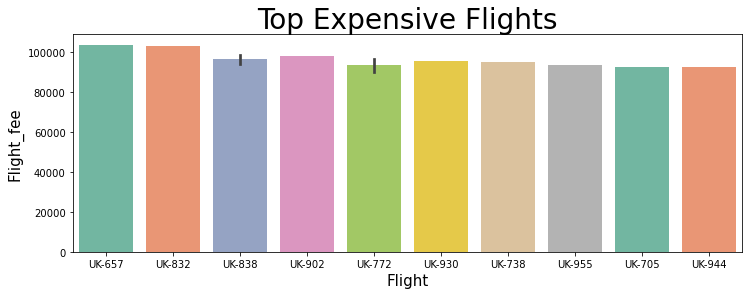

In [242]:
most_expensive_flight = x_flight.sort_values('flight_fee', ascending=False)
fig = plt.figure(figsize=(12,4))
plt.title('Top Expensive Flights', size=28)
flight = sns.barplot(data=most_expensive_flight.iloc[:15], x='flight', y='flight_fee', linewidth=2, edgecolor='none', palette='Set2')
plt.xlabel('Flight', size=15)
plt.ylabel('Flight_fee', size=15)
plt.show()

## Top 10 flight with the highest number of duration

In [211]:
long_flights = x_flight.sort_values('duration', ascending=False)
long_flights.head(10)

,flight_id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,flight_fee
1275,260992,Air_India,AI-640,Bangalore,Early_Morning,one,Evening,Chennai,36.17,44,55122
1616,267405,Vistara,UK-720,Kolkata,Early_Morning,one,Evening,Bangalore,35.08,3,82729
583,268648,Vistara,UK-720,Kolkata,Early_Morning,one,Evening,Bangalore,35.08,23,75550
896,260646,Vistara,UK-867,Bangalore,Afternoon,two_or_more,Night,Chennai,34.33,37,66778
1287,268260,Vistara,UK-706,Kolkata,Morning,one,Evening,Bangalore,32.00,17,67710
496,270200,Vistara,UK-706,Kolkata,Morning,one,Evening,Bangalore,32.00,48,67710
1729,267457,Vistara,UK-706,Kolkata,Morning,one,Evening,Bangalore,32.00,4,67710
3064,260993,Vistara,UK-867,Bangalore,Afternoon,two_or_more,Evening,Chennai,31.17,44,59106
959,259550,Vistara,UK-867,Bangalore,Afternoon,two_or_more,Evening,Chennai,31.17,16,67842
1350,266266,Air_India,AI-424,Kolkata,Afternoon,one,Evening,Mumbai,30.50,34,50271


## The total number of stops made

In [212]:
x_flight.stops.unique()

array(['one', 'zero', 'two_or_more'], dtype=object)

In [213]:
more_flights = x_flight.stops.value_counts()
more_flights

one            3028
zero            280
two_or_more      39
Name: stops, dtype: int64

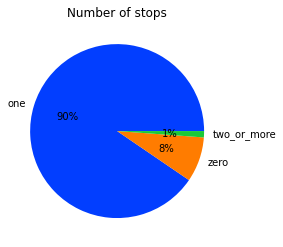

In [215]:
x_flight = [3028, 280, 39]
labels = ['one', 'zero', 'two_or_more']
colors = sns.color_palette('bright')[0:20]
plt.pie(x_flight, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Number of stops')
plt.show()